In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [2]:
# Fetch Coca-Cola stock data
ticker = 'ko' # Coca-Cola stock ticker
data = yf.download(ticker, start='2015-01-01',end='2025-03-22')
# Reset index for easier handling
data.reset_index(inplace=True)

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed


In [4]:
print(data.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2570 entries, 0 to 2569
Data columns (total 6 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   (Date, )      2570 non-null   datetime64[ns]
 1   (Close, KO)   2570 non-null   float64       
 2   (High, KO)    2570 non-null   float64       
 3   (Low, KO)     2570 non-null   float64       
 4   (Open, KO)    2570 non-null   float64       
 5   (Volume, KO)  2570 non-null   int64         
dtypes: datetime64[ns](1), float64(4), int64(1)
memory usage: 120.6 KB
None


In [10]:
print(data.head())

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
0      2015-01-02  30.437496  30.625294  30.191916  30.524171   9921100
1      2015-01-05  30.437496  31.037002  30.394160  30.834758  26292600
2      2015-01-06  30.668631  31.015332  30.509728  30.632516  16897500
3      2015-01-07  31.051449  31.138123  30.755308  30.914211  13412300
4      2015-01-08  31.427036  31.470375  31.130896  31.188681  21743600


In [12]:
print(data.tail())

Price        Date      Close       High        Low       Open    Volume
Ticker                    KO         KO         KO         KO        KO
2565   2025-03-17  70.120003  70.169998  69.080002  69.239998  15634800
2566   2025-03-18  69.379997  70.190002  69.300003  70.110001  12657600
2567   2025-03-19  69.279999  69.379997  68.540001  68.550003  14780000
2568   2025-03-20  69.709999  69.809998  69.089996  69.309998  16295300
2569   2025-03-21  68.669998  69.970001  68.180000  69.709999  47448000


In [19]:
print(data.isnull().sum())

Price   Ticker
Date              0
Close   KO        0
High    KO        0
Low     KO        0
Open    KO        0
Volume  KO        0
dtype: int64


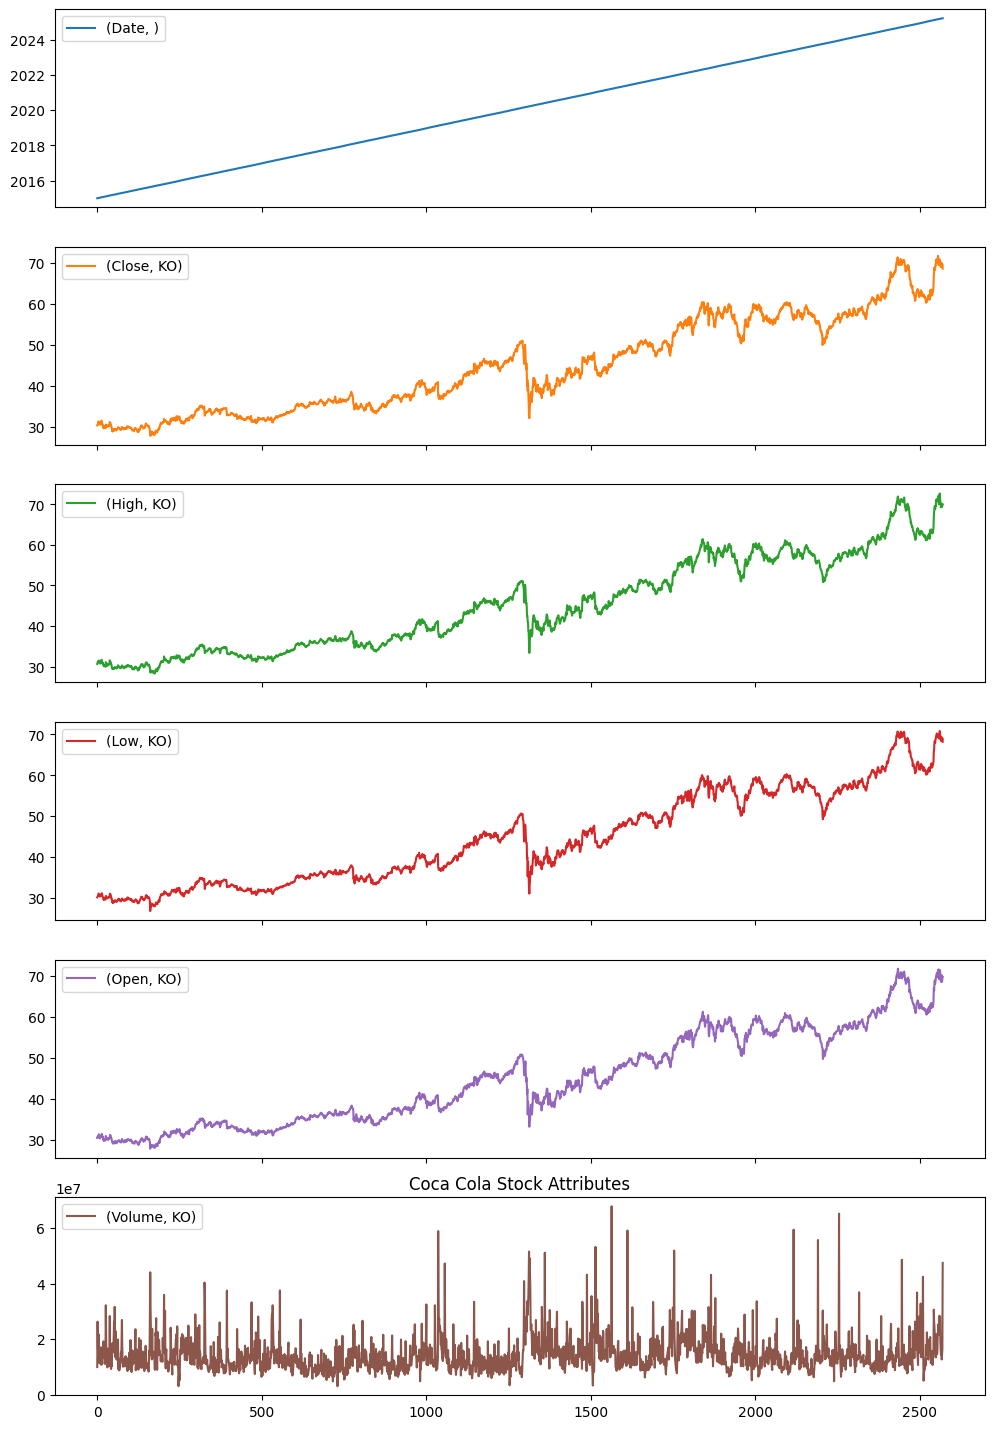

In [25]:
data.plot(subplots = True, figsize = (12,18))
plt.title('Coca Cola Stock Attributes')
plt.show()

In [19]:
data['MA20']=data['Close'].rolling(window=20).mean()
data['MA50']=data['Close'].rolling(window=50).mean()
data['Daily_Return'] = data['Close'].pct_change()
data['Volatility'] =data['Daily_Return'].rolling(window=20).std()

In [20]:
print(data.isnull().sum())

Price         Ticker
Date                     0
Close         KO         0
High          KO         0
Low           KO         0
Open          KO         0
Volume        KO         0
MA20                    19
MA50                    49
Daily_Return             1
Volatility              20
dtype: int64


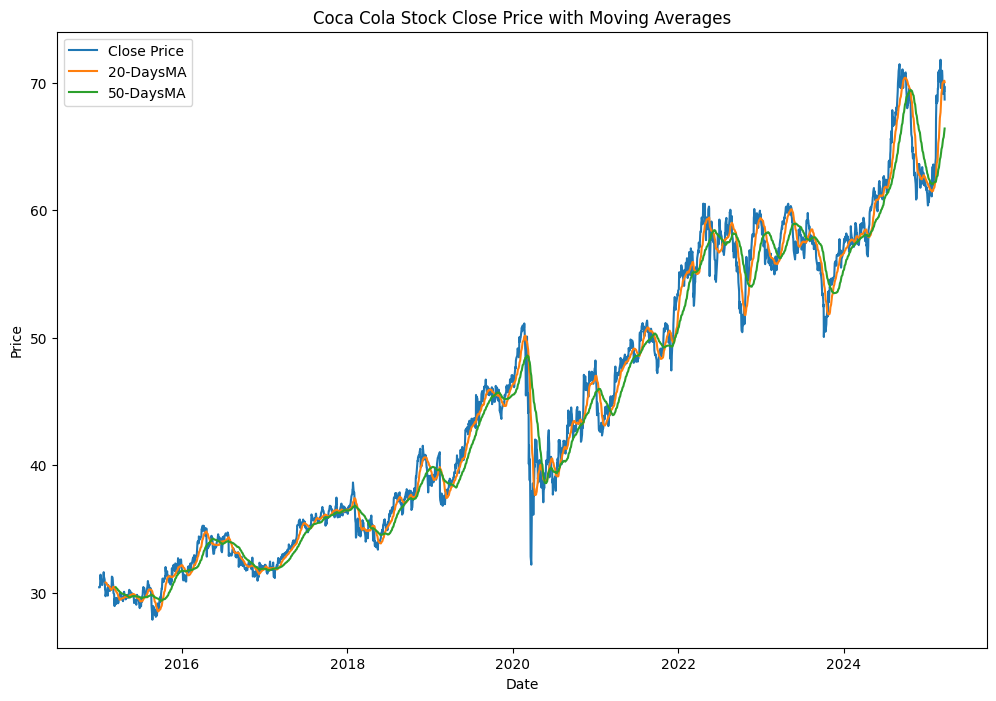

In [30]:
plt.figure(figsize=(12,8))
plt.plot(data['Date'],data['Close'],label='Close Price')
plt.plot(data['Date'],data['MA20'],label='20-DaysMA')
plt.plot(data['Date'],data['MA50'],label='50-DaysMA')
plt.title('Coca Cola Stock Close Price with Moving Averages')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

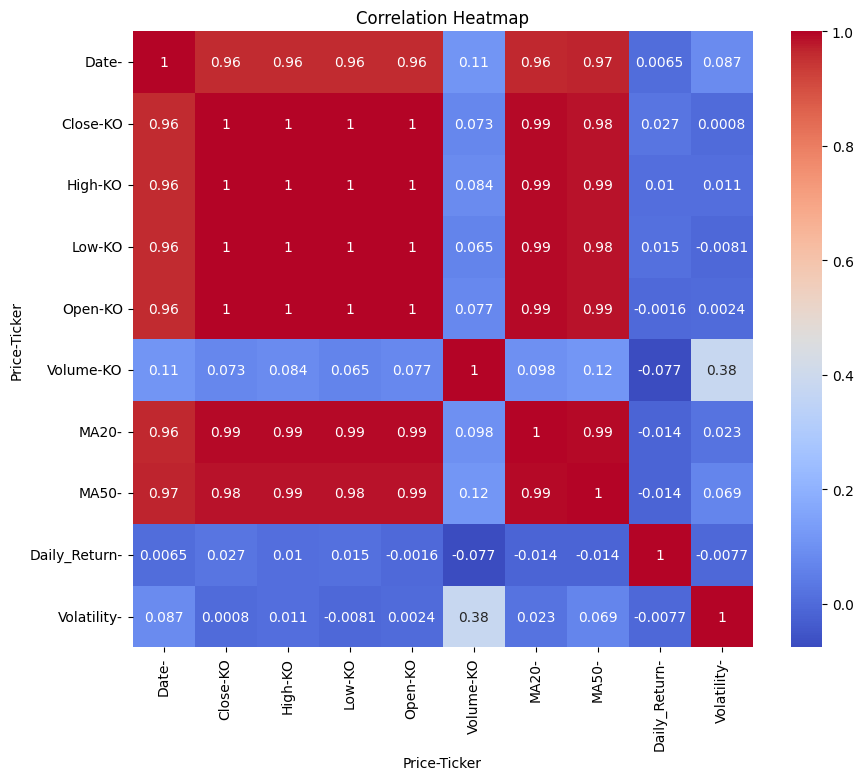

In [12]:
plt.figure(figsize=(10, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [11]:
x=data[['Open', 'High', 'Low', 'Volume','MA20','MA50','Daily_Return','Volatility']]
y=data[['Close']]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)


In [12]:
model=RandomForestRegressor()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
print(f"Mean Absolute Error: {mae}")

C:\Users\cc\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


Mean Squared Error: 0.05847301073618526
Mean Absolute Error: 0.15373327503872297


In [3]:
 live_data = yf.download(ticker, period='1d', interval='1m')

[*********************100%***********************]  1 of 1 completed


In [4]:
print(live_data.head())
live_data.shape


Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-03-28 13:30:00+00:00  71.120003  71.180000  70.809998  70.809998  679782
2025-03-28 13:31:00+00:00  71.059998  71.139999  71.019997  71.120003   21906
2025-03-28 13:32:00+00:00  70.970001  71.077202  70.945000  71.040001   19036
2025-03-28 13:33:00+00:00  70.860001  70.980003  70.860001  70.980003   17320
2025-03-28 13:34:00+00:00  70.875000  70.879997  70.820000  70.839996   12706


(390, 5)

In [5]:
print(live_data.tail())

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-03-28 19:55:00+00:00  70.434998  70.440002  70.394997  70.410004   77947
2025-03-28 19:56:00+00:00  70.404999  70.440002  70.385002  70.440002   85837
2025-03-28 19:57:00+00:00  70.410004  70.440002  70.404999  70.404999  122804
2025-03-28 19:58:00+00:00  70.369904  70.415001  70.345001  70.410004  167552
2025-03-28 19:59:00+00:00  70.370003  70.379997  70.300003  70.360001  403786


In [8]:
print(live_data)

Price                          Close       High        Low       Open  Volume
Ticker                            KO         KO         KO         KO      KO
Datetime                                                                     
2025-03-25 13:30:00+00:00  68.820000  68.949997  68.809998  68.949997  473453
2025-03-25 13:31:00+00:00  68.976196  69.019997  68.832497  68.839996   63889
2025-03-25 13:32:00+00:00  68.970001  69.000000  68.879997  68.985001   56458
2025-03-25 13:33:00+00:00  68.870003  68.964996  68.870003  68.964302   34912
2025-03-25 13:34:00+00:00  68.660004  68.870003  68.650002  68.870003   56618
...                              ...        ...        ...        ...     ...
2025-03-25 15:35:00+00:00  68.824997  68.830002  68.805000  68.815002   23087
2025-03-25 15:36:00+00:00  68.844398  68.849998  68.824997  68.824997   15493
2025-03-25 15:37:00+00:00  68.845001  68.848999  68.834999  68.836601    7875
2025-03-25 15:38:00+00:00  68.834396  68.849998  68.834396  68.8

In [6]:
live_data['MA20']=live_data['Close'].rolling(window=20).mean()
live_data['MA50']=live_data['Close'].rolling(window=50).mean()
live_data['Daily_Return']=live_data['Close'].pct_change()
live_data['Volatility']=live_data['Daily_Return'].rolling(window=20).std()

In [7]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO         0
High          KO         0
Low           KO         0
Open          KO         0
Volume        KO         0
MA20                    19
MA50                    49
Daily_Return             1
Volatility              20
dtype: int64


In [9]:
live_data.fillna(0,inplace=True)

In [10]:
print(live_data.isnull().sum())

Price         Ticker
Close         KO        0
High          KO        0
Low           KO        0
Open          KO        0
Volume        KO        0
MA20                    0
MA50                    0
Daily_Return            0
Volatility              0
dtype: int64


In [14]:
 features = ['Close', 'High', 'Low', 'Open','Volume','MA20','MA50','Daily_Return']
 latest_features = live_data[features].iloc[-1:].dropna()
 live_prediction = model.predict(latest_features)
 print(f"Predicted Closing Price: {live_prediction[0]}")

Predicted Closing Price: 70.19235130310058


2025-03-30 15:34:59.337 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-03-30 15:34:59.339 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


KeyError: "[('Close', 'KO') ('MA20', '') ('MA50', '')] not in index"